In [5]:
from nbodykit.lab import FFTPower, cosmology
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import nbodykit
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py

# plt.style.use('/home/aussing/sty.mplstyle')
mpl.rcParams.update(mpl.rcParamsDefault)

LITTLEH = 0.6688
OMEGA_MATTER = 0.321
OMEGA_BARYON = 0.045
n_s = 0.9626
sigma8 = 0.84
OMEGA_DM = OMEGA_MATTER - OMEGA_BARYON
# a_s = 2.1064e-9 # corresponding to sigma8 = 0.8105
k_p = 0.05
# n_ur = 2.046
t_cmb = 2.7255


In [ ]:
def calculate_analytical(redshift, wdm_mass,cosmo):
    k = np.geomspace(1e-4, 1e3, 500)
    Plin = cosmology.LinearPower(cosmo, redshift=redshift, transfer='EisensteinHu')

    alpha = 0.049 * (wdm_mass/1)**(-1.11) * (OMEGA_DM/0.25)**(0.11) * (LITTLEH/0.7)**1.22
    T2 = ((1+(alpha*k)**(2*1.12))**(-5/1.12))**2

    return k, Plin(k), Plin(k)*T2, T2


In [3]:
wdm_mass = 3.5 # in keV

cosmo = cosmology.Cosmology(h=LITTLEH, Omega0_b=OMEGA_BARYON, Omega0_cdm=OMEGA_DM, n_s=n_s,  P_k_max=5e2)
cosmo = cosmo.match(sigma8=0.840)
rho_bar = cosmo.rho_m(0.0) * 1e10

k_z_127, Plin_cdm_z_127, Plin_wdm_z_127, transfer_func_z_127 = calculate_analytical(127,wdm_mass,cosmo)
k_z_127, Plin_cdm_z_127, Plin_wdm_z_127_1kev, transfer_func_z_127_1kev = calculate_analytical(127,1.0,cosmo)


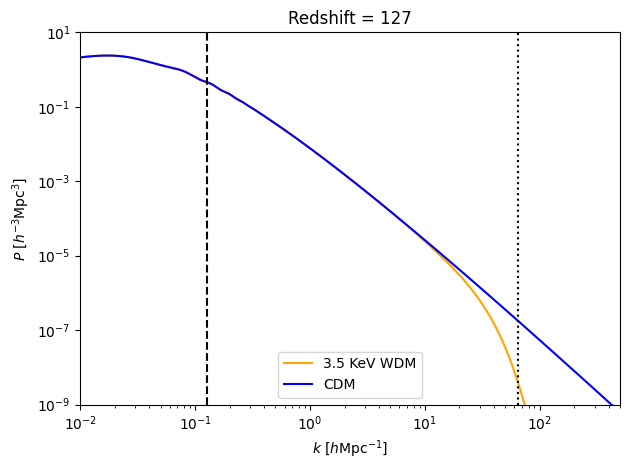

In [29]:
fig, ax = plt.subplots()
# plt.plot(k_z_127,Plin_wdm_z_127_1kev, c='r',label='1.0 KeV WDM')
plt.plot(k_z_127,Plin_wdm_z_127, c='orange',label='3.5 KeV WDM')
plt.plot(k_z_127,Plin_cdm_z_127, c='b',label='CDM')

# plt.plot(k_z_127,Plin_wdm_z_127, c='orange')

# plt.vlines(k_peak_z_127,1e-6,1e-2)
box_size = 50
npart = 1024
nyquist = np.pi/(box_size/(npart))
# nyquist_512 = np.pi/(65/(512))
# nyquist_1024 = np.pi/(65/(1024))
box = 2*np.pi/(box_size)
plt.axvline(nyquist,color='k', ls=':')
# plt.axvline(nyquist_512,color='k', ls='--')
# plt.axvline(nyquist_1024,color='k', ls='-.')
plt.axvline(box, color='k', ls='--')

# plt.text(0.95,0.95,"WDM SN=5\%",ha='right', va='top',transform=ax.transAxes,fontsize=20.0,fontweight='heavy')
# plt.text(nyquist-0.1*nyquist,1e-2,"N=$256^3$",ha='right', va='top',fontsize=30.0,fontweight='heavy')
# plt.text(nyquist_512-0.1*nyquist_512,1e-1,"N=256",ha='right', va='top',fontsize=30.0,fontweight='heavy')
# plt.text(nyquist_1024-0.1*nyquist_1024,1e-3,"N=1024$^3$",ha='right', va='top',fontsize=30.0,fontweight='heavy')
# plt.text(box+0.1*box,1e-2,r"L=65 $h^{-1}$Mpc",ha='left', va='top',fontsize=30.0,fontweight='heavy')


plt.ylim(1e-9,1e1)
plt.xlim(1e-2,5e2)
plt.xscale('log')
plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.yscale('log')
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.title('Redshift = 127')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()
# plt.ylim(1e-6,1e-2)
# # plt.vlines(nyquist,1e-3,1)
# plt.savefig('./test.png',dpi=300)